# Identify the location to increase COVID-19 Healthcare facilities

In [2]:
!pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 6.2 MB/s  eta 0:00:01


In [3]:
from bs4 import BeautifulSoup
import requests
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import rgb2hex
from sklearn.cluster import KMeans
import folium
import math
#import warnings
#warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:25: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


# Data Exploration

In [4]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_districts_of_Tamil_Nadu"

In [5]:
table_class = "wikitable sortable"

In [6]:
response = requests.get(wiki_url)

In [7]:
soup = BeautifulSoup(response.text, 'html.parser')

In [8]:
tn_table = soup.find('table', {'class':table_class})
tn_table_pd = pd.read_html(str(tn_table))
df = tn_table_pd[0]

In [9]:
df.head(10)

,No.,District,Code,Capital,Date of official formation,Split from,Area (km2),Population[34],Populationdensity(/km2),Taluks[35],Map
0,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,NaN
1,2.0,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,2944.96,2556244,868,Chengalpattu Cheyyur Madurantakam Pallavaram Tambaram Thiruporur Thirukazhukundram Vandalur,NaN
2,3.0,Chennai,CH,Chennai,1 November 1956,"One of the original 13 districts (under former name of ""Madras District"")",426,4646732,26076,Alandur Ambattur Aminjikarai Ayanavaram Egmore Guindy Madhavaram Maduravoyal Mambalam Mylapore Perambur Purasawalkam Sholinganallur Tiruvottiyur Tondiarpet Velachery,NaN
3,4.0,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,"4,723[36]",3458045,732,Anaimalai Annur Coimbatore-North Coimbatore-South Kinathukadavu Madukkarai Mettupalayam Perur Pollachi Sulur Valparai,NaN
4,5.0,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot District,3703,2605914,709,Bhuvanagiri Chidambaram Cuddalore Kattumannarkoil Kurinjipadi Panruti Srimushnam Titakudi Veppur Vriddachalam,NaN
5,6.0,Dharmapuri,DH,Dharmapuri,2 October 1965,Salem,4497.77,1506843,335,Dharmapuri Harur Karimangalam Nallampalli Palacode Pappireddipatti Pennagaram,NaN
6,7.0,Dindigul,DI,Dindigul,15 September 1985,Madurai,6266.64,2159775,345,Athoor Dindigul-West Dindigul-East Gujiliamparai Kodaikanal Natham Nilakottai Oddanchattiram Palani Vedasandur,NaN
7,8.0,Erode,ER,Erode,31 August 1979,Coimbatore,"5,722[37]",2251744,394,Anthiyur Bhavani Erode Gobichettipalayam Kodumudi Modakurichi Nambiyur Perundurai Sathyamangalam Thalavadi,NaN
8,9.0,Kallakurichi,KL,Kallakurichi,26 November 2019,Viluppuram,3520.37,1370281,389,Chinnasalem Kallakkurichi Kalvarayan Hills Sankarapuram Thirukoilur Ulundurpet,NaN
9,10.0,Kanchipuram,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,NaN


In [10]:
df.dtypes

No.                           float64
District                      object 
Code                          object 
Capital                       object 
Date of official formation    object 
Split from                    object 
Area (km2)                    object 
Population[34]                int64  
Populationdensity(/km2)       int64  
Taluks[35]                    object 
Map                           float64
dtype: object

In [11]:
df = df.rename(columns={'Area (km2)': 'Area','Population[34]':'Population', 'Populationdensity(/km2)':'Populationdensity_per_km2', 'Taluks[35]' :'Taluks' }, inplace = False)

In [12]:
df.head()

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Map
0,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,NaN
1,2.0,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,2944.96,2556244,868,Chengalpattu Cheyyur Madurantakam Pallavaram Tambaram Thiruporur Thirukazhukundram Vandalur,NaN
2,3.0,Chennai,CH,Chennai,1 November 1956,"One of the original 13 districts (under former name of ""Madras District"")",426,4646732,26076,Alandur Ambattur Aminjikarai Ayanavaram Egmore Guindy Madhavaram Maduravoyal Mambalam Mylapore Perambur Purasawalkam Sholinganallur Tiruvottiyur Tondiarpet Velachery,NaN
3,4.0,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,"4,723[36]",3458045,732,Anaimalai Annur Coimbatore-North Coimbatore-South Kinathukadavu Madukkarai Mettupalayam Perur Pollachi Sulur Valparai,NaN
4,5.0,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot District,3703,2605914,709,Bhuvanagiri Chidambaram Cuddalore Kattumannarkoil Kurinjipadi Panruti Srimushnam Titakudi Veppur Vriddachalam,NaN


In [13]:

for ind in df.index:
    df['Area'][ind] = df['Area'][ind].replace(',','')
    if df['Area'][ind].find("[") != -1:
        print(df['Area'][ind])
        string = df['Area'][ind]
        string = string[0: (df['Area'][ind].find("["))]
        print( string)
        df['Area'][ind] = string




4723[36]
4723
5722[37]
5722


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [14]:
df['Area'] =df['Area'].astype(float)
df.dtypes


No.                           float64
District                      object 
Code                          object 
Capital                       object 
Date of official formation    object 
Split from                    object 
Area                          float64
Population                    int64  
Populationdensity_per_km2     int64  
Taluks                        object 
Map                           float64
dtype: object

In [15]:
CLIENT_ID = 'QZNC24IIFPKZRH5NSHQJN3WDFBGPHHO1PP1F5MSQI0DA01KO' # your Foursquare ID
CLIENT_SECRET = 'PY4UPNJDJRDBRENFIDHVLIJ35QW14QEQBKKFXFE3ZVE1YZYY' # your Foursquare Secret
ACCESS_TOKEN = '0EE3WPELNSLRXZMA1V3CBHW0WIMNR05J1DXK3XB405SWPQ52' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QZNC24IIFPKZRH5NSHQJN3WDFBGPHHO1PP1F5MSQI0DA01KO
CLIENT_SECRET:PY4UPNJDJRDBRENFIDHVLIJ35QW14QEQBKKFXFE3ZVE1YZYY


In [16]:
def findGeocode(district):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="foursquare_agent")
          
        return geolocator.geocode(district + " Tamil Nadu, India")
      
    except GeocoderTimedOut:
          
        return findGeocode(district)  

#geolocator = Nominatim(user_agent="foursquare_agent")
#location = geolocator.geocode(address)
#latitude = location.latitude
#longitude = location.longitude
#print(latitude, longitude)

In [17]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []

# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df["District"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

In [18]:
# now add this column to dataframe
df["Longitude"] = longitude
df["Latitude"] = latitude



In [19]:
df.drop(['Map'], axis='columns', inplace=True)
df

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude
0,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,79.117455,11.076036
1,2.0,Chengalpattu,CGL,Chengalpattu,29 November 2019,Kanchipuram,2944.96,2556244,868,Chengalpattu Cheyyur Madurantakam Pallavaram Tambaram Thiruporur Thirukazhukundram Vandalur,79.983637,12.684089
2,3.0,Chennai,CH,Chennai,1 November 1956,"One of the original 13 districts (under former name of ""Madras District"")",426.00,4646732,26076,Alandur Ambattur Aminjikarai Ayanavaram Egmore Guindy Madhavaram Maduravoyal Mambalam Mylapore Perambur Purasawalkam Sholinganallur Tiruvottiyur Tondiarpet Velachery,80.270186,13.083694
3,4.0,Coimbatore,CO,Coimbatore,1 November 1956,One of the original 13 districts,4723.00,3458045,732,Anaimalai Annur Coimbatore-North Coimbatore-South Kinathukadavu Madukkarai Mettupalayam Perur Pollachi Sulur Valparai,76.962842,11.001812
4,5.0,Cuddalore,CU,Cuddalore,30 September 1993,South Arcot District,3703.00,2605914,709,Bhuvanagiri Chidambaram Cuddalore Kattumannarkoil Kurinjipadi Panruti Srimushnam Titakudi Veppur Vriddachalam,79.763464,11.756433
5,6.0,Dharmapuri,DH,Dharmapuri,2 October 1965,Salem,4497.77,1506843,335,Dharmapuri Harur Karimangalam Nallampalli Palacode Pappireddipatti Pennagaram,78.193043,12.096805
6,7.0,Dindigul,DI,Dindigul,15 September 1985,Madurai,6266.64,2159775,345,Athoor Dindigul-West Dindigul-East Gujiliamparai Kodaikanal Natham Nilakottai Oddanchattiram Palani Vedasandur,78.067398,10.330330
7,8.0,Erode,ER,Erode,31 August 1979,Coimbatore,5722.00,2251744,394,Anthiyur Bhavani Erode Gobichettipalayam Kodumudi Modakurichi Nambiyur Perundurai Sathyamangalam Thalavadi,77.676627,11.369204
8,9.0,Kallakurichi,KL,Kallakurichi,26 November 2019,Viluppuram,3520.37,1370281,389,Chinnasalem Kallakkurichi Kalvarayan Hills Sankarapuram Thirukoilur Ulundurpet,78.963713,11.740626
9,10.0,Kanchipuram,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,79.705330,12.836393


# Data Analysis

<BarContainer object of 38 artists>

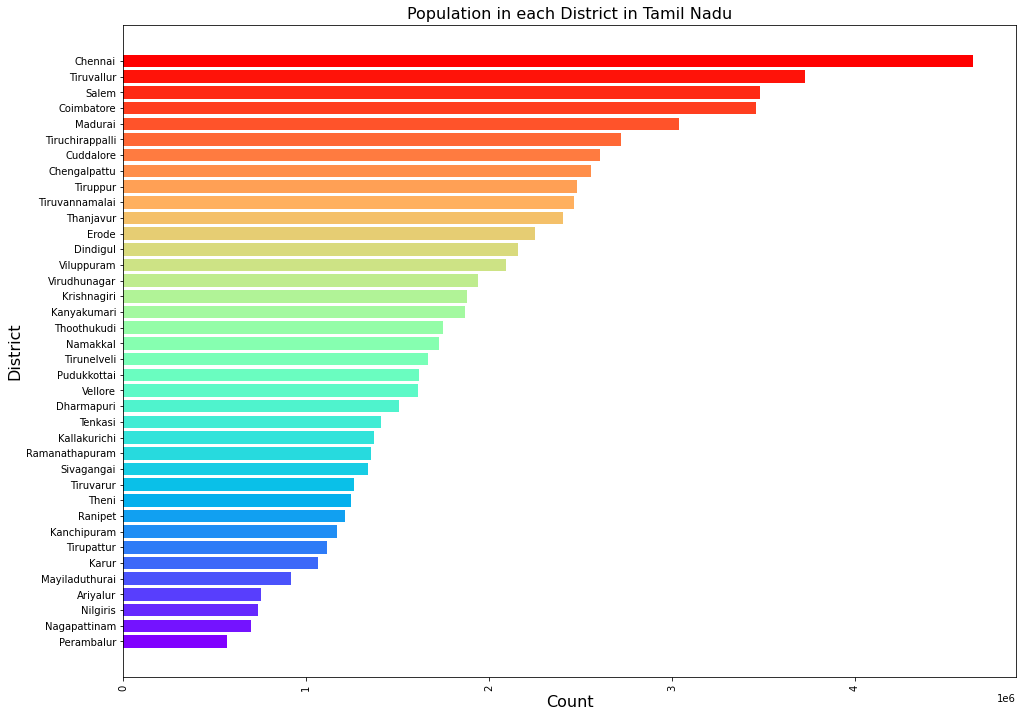

In [20]:
df.sort_values('Population',inplace=True)
population = df['Population']
district = df['District']


colors = cm.rainbow(np.linspace(0, 1, len(population.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("Count", fontsize = 16)
plt.ylabel("District", fontsize = 16)
plt.title("Population in each District in Tamil Nadu", fontsize = 16)
plt.barh(district, population.values, color = colors)

In [21]:
geolocator = Nominatim(user_agent="tourist_explorist")
location = geolocator.geocode('Tamil Nadu')
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of ' + 'Tamil Nadu' + ' are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Tamil Nadu are 10.9094334, 78.3665347.


In [22]:
#map of State using latitude and longitude values
map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, district, density in zip(df['Latitude'], df['Longitude'], df['District'], df['Populationdensity_per_km2']):
    label = '{}, {}'.format(district, density)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=density/300,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

In [23]:
LIMIT = 10000

def getNearbyVenues_hospital(names, latitudes, longitudes, radius=50000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d196941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    nearby_venues = nearby_venues[nearby_venues['Venue Category'].isin(['Hospital'])]
    
    return(nearby_venues)

In [24]:
state_hospitals = getNearbyVenues_hospital(names=df['District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Perambalur
Nagapattinam
Nilgiris
Ariyalur
Mayiladuthurai
Karur
Tirupattur
Kanchipuram
Ranipet
Theni
Tiruvarur
Sivagangai
Ramanathapuram
Kallakurichi
Tenkasi
Dharmapuri
Vellore
Pudukkottai
Tirunelveli
Namakkal
Thoothukudi
Kanyakumari
Krishnagiri
Virudhunagar
Viluppuram
Dindigul
Erode
Thanjavur
Tiruvannamalai
Tiruppur
Chengalpattu
Cuddalore
Tiruchirappalli
Madurai
Coimbatore
Salem
Tiruvallur
Chennai


In [25]:
state_hospitals

,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Perambalur,11.228772,78.818256,Apollo Sugar Clinic - Diabetes Centre - Greamsroad,11.422191,78.813064,Hospital
1,Perambalur,11.228772,78.818256,Govt primary health centre,11.134119,78.514448,Hospital
2,Perambalur,11.228772,78.818256,frontline hospital,10.830025,78.697536,Hospital
3,Perambalur,11.228772,78.818256,ABC Hospitals,10.830694,78.684737,Hospital
4,Perambalur,11.228772,78.818256,jeyam speciality hospitals,10.828493,78.685856,Hospital
5,Perambalur,11.228772,78.818256,Vasan Eye Care,10.828167,78.685004,Hospital
6,Perambalur,11.228772,78.818256,Sri Krishna Clinic,10.828240,78.684222,Hospital
7,Perambalur,11.228772,78.818256,Mangalam,10.821953,78.692452,Hospital
8,Perambalur,11.228772,78.818256,CSI Mission General Hospital,10.824415,78.674019,Hospital
9,Perambalur,11.228772,78.818256,KMC Hospital,10.816706,78.681492,Hospital


In [26]:
# Removing all Eye Care Hospitals
for ind in state_hospitals.index:
    if state_hospitals['Venue'][ind].find("Eye") != -1:
        print(state_hospitals['Venue'][ind])
        state_hospitals.drop(ind, inplace = True)



Vasan Eye Care
St. Joseph's Eye Hospital
Vasan Eye Care Hospital
Dr.Ravikumar's Eye Care Hospital
Dr.Ravikumar's Eye Care Hospital
St. Joseph's Eye Hospital
Vasan Eye Care
Aravind Eye Hospital
Vasan Eye Care Hospital
Dr Agareal's Eye Hospital Ltd
Annai Eye Clinic
Aravind Eye Hospital
Aravind Eye Hospital
Aravind Eye Hospital
Vasan Eye Care
Aravind Eye Hospital
Vasan Eye Care
Dr Agareal's Eye Hospital Ltd
Vasan Eye Care Hospital
St. Joseph's Eye Hospital
Vasan Eye Care
Sankara Eye Care Center
Rajan Eye Care Hospital
Vasan Eye Care
Aravind Eye Hospital
Vasan Eye Care
St. Joseph's Eye Hospital
Vasan Eye Care
Aravind Eye Hospital
Vasan Eye Care
Sankara Eye Care Center
Vasan Eye Care Hospital
Rajan Eye Care Hospital
Dr Agarwal's Eye Hospital
Sankara Nethralaya Eye Hospital
Vasan Eye Care
Rajan Eye Care Hospital
Vasan Eye Care Hospital
Sankara Nethralaya Eye Hospital
Dr Agarwal's Eye Hospital
Vasan Eye Care


In [27]:
state_hospitals


,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Perambalur,11.228772,78.818256,Apollo Sugar Clinic - Diabetes Centre - Greamsroad,11.422191,78.813064,Hospital
1,Perambalur,11.228772,78.818256,Govt primary health centre,11.134119,78.514448,Hospital
2,Perambalur,11.228772,78.818256,frontline hospital,10.830025,78.697536,Hospital
3,Perambalur,11.228772,78.818256,ABC Hospitals,10.830694,78.684737,Hospital
4,Perambalur,11.228772,78.818256,jeyam speciality hospitals,10.828493,78.685856,Hospital
6,Perambalur,11.228772,78.818256,Sri Krishna Clinic,10.828240,78.684222,Hospital
7,Perambalur,11.228772,78.818256,Mangalam,10.821953,78.692452,Hospital
8,Perambalur,11.228772,78.818256,CSI Mission General Hospital,10.824415,78.674019,Hospital
9,Perambalur,11.228772,78.818256,KMC Hospital,10.816706,78.681492,Hospital
10,Perambalur,11.228772,78.818256,Mahatma Gandhi Government Hospital,10.811601,78.677304,Hospital


In [28]:

no_hospitals_in_district = state_hospitals.groupby('District', as_index=False).count()
no_hospitals_in_district = no_hospitals_in_district[['District','Venue']]
no_hospitals_in_district.rename(columns={'Venue':'No of Hospitals'}, inplace=True)
no_hospitals_in_district

,District,No of Hospitals
0,Ariyalur,8
1,Chengalpattu,28
2,Chennai,44
3,Coimbatore,12
4,Cuddalore,9
5,Dharmapuri,9
6,Dindigul,3
7,Erode,9
8,Kallakurichi,4
9,Kanchipuram,6


<BarContainer object of 34 artists>

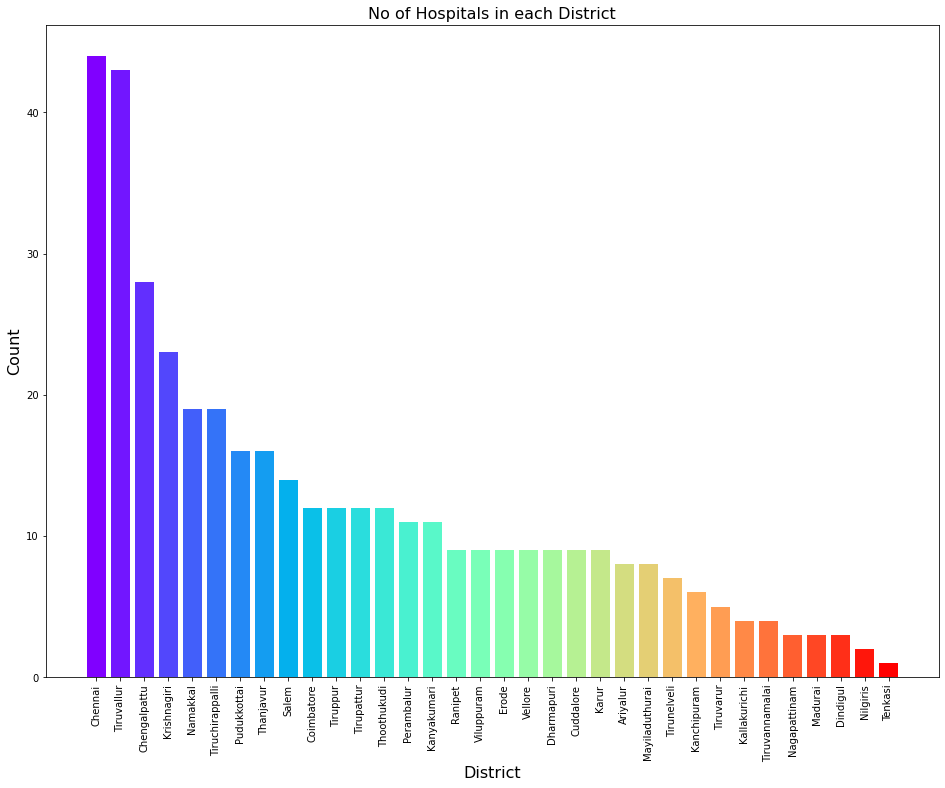

In [29]:
no_hospitals_in_district.sort_values('No of Hospitals', ascending=False, inplace=True)
venues = no_hospitals_in_district['No of Hospitals']
district = no_hospitals_in_district['District']

colors = cm.rainbow(np.linspace(0, 1, len(venues.index)))
plt.figure(figsize = (16, 12))
plt.xticks(rotation = 90)
plt.xlabel("District", fontsize = 16)
plt.ylabel("Count", fontsize = 16)
plt.title("No of Hospitals in each District", fontsize = 16)
plt.bar(district, venues.values, color = colors)

In [30]:
no_hospitals_in_district.set_index('District')

,No of Hospitals
District,
Chennai,44
Tiruvallur,43
Chengalpattu,28
Krishnagiri,23
Namakkal,19
Tiruchirappalli,19
Pudukkottai,16
Thanjavur,16
Salem,14


In [31]:
df.set_index('District')

,No.,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude
District,,,,,,,,,,,
Perambalur,19.0,PE,Perambalur,30 September 1995,Tiruchirappalli,1757.00,565223,320,Alathur Kunnam Perambalur Veppanthattai,78.818256,11.228772
Nagapattinam,16.0,NG,Nagapattinam,18 October 1991,Thanjavur,1397.00,697069,498,Kilvelur Nagapattinam Thirukkuvalai Vedaranyam,79.824660,10.805628
Nilgiris,18.0,NI,Ooty,1 November 1956,One of the original 13 districts,2545.00,735394,300,Coonoor Gudalur Kotagiri Kundah Pandalur Udagamandalam,76.700000,11.400000
Ariyalur,1.0,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,79.117455,11.076036
Mayiladuthurai,15.0,MYD,Mayiladuthurai,28 December 2020,Nagapattinam,1172.00,918356,784,Kuthalam Mayiladuthurai Sirkazhi Tharangambadi,79.627394,11.155182
Karur,12.0,KR,Karur,30 September 1995,Tiruchirappalli,2895.57,1064493,357,Aravakurichi Kadavur Karur Krishnarayapuram Kulithalai Manmangalam Pugalur,78.084855,10.930152
Tirupattur,31.0,TU,Tirupattur,28 November 2019,Vellore,1797.92,1111812,618,Ambur Natrampalli Tirupattur Vaniyambadi,78.564709,12.490898
Kanchipuram,10.0,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,79.705330,12.836393
Ranipet,22.0,RN,Ranipet,28 November 2019,Vellore,2234.32,1210277,542,Arakkonam Arcot Kalavai Nemili Sholingur Walajapet,79.333008,12.927264


In [32]:
df_hospitals = pd.merge(df,no_hospitals_in_district, on='District', how='outer')

In [33]:
df_hospitals

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude,No of Hospitals
0,19.0,Perambalur,PE,Perambalur,30 September 1995,Tiruchirappalli,1757.00,565223,320,Alathur Kunnam Perambalur Veppanthattai,78.818256,11.228772,11.0
1,16.0,Nagapattinam,NG,Nagapattinam,18 October 1991,Thanjavur,1397.00,697069,498,Kilvelur Nagapattinam Thirukkuvalai Vedaranyam,79.824660,10.805628,3.0
2,18.0,Nilgiris,NI,Ooty,1 November 1956,One of the original 13 districts,2545.00,735394,300,Coonoor Gudalur Kotagiri Kundah Pandalur Udagamandalam,76.700000,11.400000,2.0
3,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,79.117455,11.076036,8.0
4,15.0,Mayiladuthurai,MYD,Mayiladuthurai,28 December 2020,Nagapattinam,1172.00,918356,784,Kuthalam Mayiladuthurai Sirkazhi Tharangambadi,79.627394,11.155182,8.0
5,12.0,Karur,KR,Karur,30 September 1995,Tiruchirappalli,2895.57,1064493,357,Aravakurichi Kadavur Karur Krishnarayapuram Kulithalai Manmangalam Pugalur,78.084855,10.930152,9.0
6,31.0,Tirupattur,TU,Tirupattur,28 November 2019,Vellore,1797.92,1111812,618,Ambur Natrampalli Tirupattur Vaniyambadi,78.564709,12.490898,12.0
7,10.0,Kanchipuram,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,79.705330,12.836393,6.0
8,22.0,Ranipet,RN,Ranipet,28 November 2019,Vellore,2234.32,1210277,542,Arakkonam Arcot Kalavai Nemili Sholingur Walajapet,79.333008,12.927264,9.0
9,27.0,Theni,TH,Theni,25 July 1996,Madurai,3242.30,1245899,406,Andipatti Bodniayakkanur Theni Periyakulam Uthamapalayam,77.474200,9.969664,NaN


In [34]:
df_hospitals['No of Hospitals'] = df_hospitals['No of Hospitals'].fillna(0)
df_hospitals

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude,No of Hospitals
0,19.0,Perambalur,PE,Perambalur,30 September 1995,Tiruchirappalli,1757.00,565223,320,Alathur Kunnam Perambalur Veppanthattai,78.818256,11.228772,11.0
1,16.0,Nagapattinam,NG,Nagapattinam,18 October 1991,Thanjavur,1397.00,697069,498,Kilvelur Nagapattinam Thirukkuvalai Vedaranyam,79.824660,10.805628,3.0
2,18.0,Nilgiris,NI,Ooty,1 November 1956,One of the original 13 districts,2545.00,735394,300,Coonoor Gudalur Kotagiri Kundah Pandalur Udagamandalam,76.700000,11.400000,2.0
3,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,79.117455,11.076036,8.0
4,15.0,Mayiladuthurai,MYD,Mayiladuthurai,28 December 2020,Nagapattinam,1172.00,918356,784,Kuthalam Mayiladuthurai Sirkazhi Tharangambadi,79.627394,11.155182,8.0
5,12.0,Karur,KR,Karur,30 September 1995,Tiruchirappalli,2895.57,1064493,357,Aravakurichi Kadavur Karur Krishnarayapuram Kulithalai Manmangalam Pugalur,78.084855,10.930152,9.0
6,31.0,Tirupattur,TU,Tirupattur,28 November 2019,Vellore,1797.92,1111812,618,Ambur Natrampalli Tirupattur Vaniyambadi,78.564709,12.490898,12.0
7,10.0,Kanchipuram,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,79.705330,12.836393,6.0
8,22.0,Ranipet,RN,Ranipet,28 November 2019,Vellore,2234.32,1210277,542,Arakkonam Arcot Kalavai Nemili Sholingur Walajapet,79.333008,12.927264,9.0
9,27.0,Theni,TH,Theni,25 July 1996,Madurai,3242.30,1245899,406,Andipatti Bodniayakkanur Theni Periyakulam Uthamapalayam,77.474200,9.969664,0.0


In [35]:
# Districts with No Hospitals
df_hospitals[(df_hospitals['No of Hospitals'] == 0)]

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude,No of Hospitals
9,27.0,Theni,TH,Theni,25 July 1996,Madurai,3242.30,1245899,406,Andipatti Bodniayakkanur Theni Periyakulam Uthamapalayam,77.474200,9.969664,0.0
11,24.0,Sivagangai,SI,Sivagangai,15 March 1985,Ramanathapuram,4189.00,1339101,328,Devakottai Ilayangudi Kalayarkoil Karaikudi Manamadurai Singampunari Sivaganga Tirupathur Tiruppuvanam,78.720428,9.965060,0.0
12,21.0,Ramanathapuram,RA,Ramanathapuram,1 November 1956,One of the original 13 districts,4068.31,1353445,331,Kadaladi Kamuthi Kilakarai Mudukulathur Paramakudi Raja Singa Mangalam Ramanathapuram Rameswaram Tiruvadanai,78.859071,9.389552,0.0
23,38.0,Virudhunagar,VR,Virudhunagar,15 March 1985,Ramanathapuram,4241.00,1942288,453,Aruppukkottai Kariapatti Rajapalayam Sattur Sivakasi Srivilliputhur Tiruchuli Virudhunagar Watrap Vembakottai,77.878456,9.520894,0.0


In [36]:
df_hospitals['Density Per Hospital'] =  round(df_hospitals['Population']/df_hospitals['No of Hospitals'],0)


In [37]:
df_hospitals

,No.,District,Code,Capital,Date of official formation,Split from,Area,Population,Populationdensity_per_km2,Taluks,Longitude,Latitude,No of Hospitals,Density Per Hospital
0,19.0,Perambalur,PE,Perambalur,30 September 1995,Tiruchirappalli,1757.00,565223,320,Alathur Kunnam Perambalur Veppanthattai,78.818256,11.228772,11.0,51384.0
1,16.0,Nagapattinam,NG,Nagapattinam,18 October 1991,Thanjavur,1397.00,697069,498,Kilvelur Nagapattinam Thirukkuvalai Vedaranyam,79.824660,10.805628,3.0,232356.0
2,18.0,Nilgiris,NI,Ooty,1 November 1956,One of the original 13 districts,2545.00,735394,300,Coonoor Gudalur Kotagiri Kundah Pandalur Udagamandalam,76.700000,11.400000,2.0,367697.0
3,1.0,Ariyalur,AR,Ariyalur,23 November 2007,Perambalur,1949.31,754894,390,Andimadam Ariyalur Udayarpalayam Sendurai,79.117455,11.076036,8.0,94362.0
4,15.0,Mayiladuthurai,MYD,Mayiladuthurai,28 December 2020,Nagapattinam,1172.00,918356,784,Kuthalam Mayiladuthurai Sirkazhi Tharangambadi,79.627394,11.155182,8.0,114794.0
5,12.0,Karur,KR,Karur,30 September 1995,Tiruchirappalli,2895.57,1064493,357,Aravakurichi Kadavur Karur Krishnarayapuram Kulithalai Manmangalam Pugalur,78.084855,10.930152,9.0,118277.0
6,31.0,Tirupattur,TU,Tirupattur,28 November 2019,Vellore,1797.92,1111812,618,Ambur Natrampalli Tirupattur Vaniyambadi,78.564709,12.490898,12.0,92651.0
7,10.0,Kanchipuram,KC,Kanchipuram,1 July 1997,Chingleput,1655.94,1166401,704,Kanchipuram Kundrathur Sriperumbudur Uthiramerur Walajabad,79.705330,12.836393,6.0,194400.0
8,22.0,Ranipet,RN,Ranipet,28 November 2019,Vellore,2234.32,1210277,542,Arakkonam Arcot Kalavai Nemili Sholingur Walajapet,79.333008,12.927264,9.0,134475.0
9,27.0,Theni,TH,Theni,25 July 1996,Madurai,3242.30,1245899,406,Andipatti Bodniayakkanur Theni Periyakulam Uthamapalayam,77.474200,9.969664,0.0,inf


In [38]:
#df_hospitals.sort_values('Density Per Hospital',inplace=True)



#colors = cm.rainbow(np.linspace(0, 1, len(density_population.index)))

#map of State using latitude and longitude values

map_state = folium.Map(location=[latitude, longitude], zoom_start=7)


# add markers to map
for lat, lng, district, density in zip(df_hospitals['Latitude'], df_hospitals['Longitude'], df_hospitals['District'], df_hospitals['Density Per Hospital']):
    label = '{}, {}'.format(district, density)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=density/50000,
        popup=label,
        color='green',
        fill=True,
        fill_color = '#FF0000',
        fill_opacity=0.7,
        parse_html=False).add_to(map_state)  
    
map_state

#        fill_color='#3186cc',

In [47]:
# Districts with more people per hospitals

df_hospitals.sort_values('Density Per Hospital',inplace=True)
df_hospitals[['District','Density Per Hospital']].tail(10)

,District,Density Per Hospital
13,Kallakurichi,342570.0
2,Nilgiris,367697.0
28,Tiruvannamalai,616219.0
25,Dindigul,719925.0
33,Madurai,1012751.0
14,Tenkasi,1407627.0
9,Theni,inf
11,Sivagangai,inf
12,Ramanathapuram,inf
23,Virudhunagar,inf


4.	Conclusions 
In this study, we analysed the population and hospitals in each district to determine which districts require more attention for health care facilities.
Analysis identified the  districts do not have any medical facilities and they must travel nearby districts for hospitals. 

Also, we noted, following districts require immediate attention as the people per hospital in these districts are more than 300k to 1 million.

 
